In [2]:
import pandas as pd

data = pd.read_csv('raw_data.csv')

In [67]:
print(data.iloc[:10,[0,1,2,3]])

         r%  time (years)  notional ($)       PV($)
0  0.007600      0.005348    483.449183  483.429607
1  0.030114      0.015072    712.712067  712.393427
2  0.020456      0.026282     13.275573   13.268510
3  0.009520      0.027672   -368.781503 -368.684826
4  0.072450      0.030814    112.817616  112.574722
5  0.075454      0.034572    418.347914  417.297139
6  0.006253      0.075516    380.387921  380.208902
7  0.055668      0.078473     23.554652   23.454730
8  0.032270      0.080739   -159.885545 -159.476072
9  0.066848      0.080996   -114.608620 -114.009515


In [71]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
r%,1043.0,0.053129,0.025732,0.000464,0.034167,0.051660,0.072879,0.153536
time (years),1043.0,3.284062,2.174226,0.005348,1.580209,2.948344,4.626730,12.539319
notional ($),1043.0,118.998975,506.098547,-1610.072708,-228.025952,108.710728,455.045592,1964.086626
PV($),1043.0,97.909646,435.896655,-1592.842134,-195.890690,92.433204,387.835737,1763.828859


In [72]:
data.shape

(1043, 4)

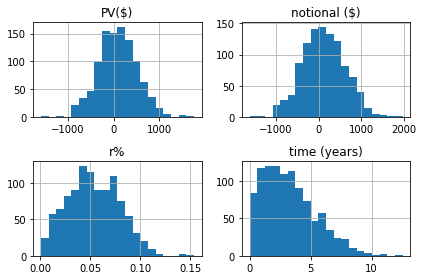

In [7]:
import matplotlib.pyplot as plt

rdata=data.iloc[0:,[0]]
tdata=data.iloc[0:,[1]]
ndata=data.iloc[0:,[2]]
pvdata=data.iloc[0:,[3]]

data.hist(bins=20)

plt.grid(True)
plt.tight_layout()
plt.show()

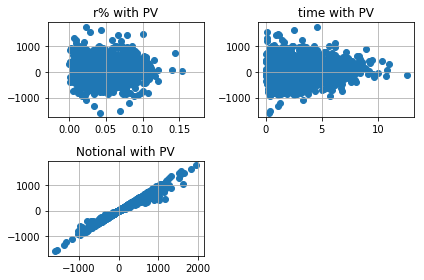

In [14]:
import matplotlib.pyplot as plt

rdata=data.iloc[0:,[0]]
tdata=data.iloc[0:,[1]]
ndata=data.iloc[0:,[2]]
pvdata=data.iloc[0:,[3]]

#pvdata.hist(bins=20)
plt.subplot(2,2,1)
plt.grid(True)
plt.title('r% with PV')
plt.scatter(rdata,pvdata)


plt.subplot(2,2,2)
plt.grid(True)
plt.title('time with PV')
plt.scatter(tdata,pvdata)

plt.subplot(2,2,3)
plt.grid(True)
plt.title('Notional with PV')
plt.scatter(ndata,pvdata)


plt.tight_layout()
plt.show()

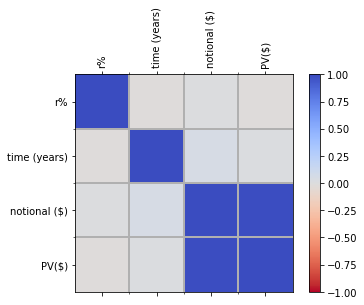

In [15]:
import matplotlib.pyplot as plt
import numpy as np

corr=data.corr()

ax = plt.subplot(1,1,1)
cax=ax.matshow(corr,cmap='coolwarm_r',vmin=-1,vmax=1)
#cax=ax.matshow(corr,cmap='coolwarm',vmin=-1,vmax=1)

plt.colorbar(cax)

plt.xticks(rotation=90)

ticks=np.arange(0,len(data.columns),1)
ticks_minor = np.arange(0,len(data.columns)-1,1)

ax.set_xticks(ticks)
ax.set_xticks(ticks_minor+0.5,minor=True)

ax.set_yticks(ticks)
ax.set_yticks(ticks_minor+0.5,minor=True)

ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)

plt.grid(which='minor', linestyle='-', lw=2)

plt.show()

In [75]:

X = data.drop('PV($)',axis=1)
y = data['PV($)']


In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [82]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [156]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(hidden_layer_sizes=(100,100,100),max_iter=5000,verbose=True,tol=0.0000001)

In [157]:
mlp.fit(X_train,y_train)

Iteration 1, loss = 100388.39116781
Iteration 2, loss = 100269.19981659
Iteration 3, loss = 100128.50398701
Iteration 4, loss = 99952.19273181
Iteration 5, loss = 99722.02088929
Iteration 6, loss = 99397.05105765
Iteration 7, loss = 98983.41737084
Iteration 8, loss = 98387.54921070
Iteration 9, loss = 97632.93577373
Iteration 10, loss = 96642.65296012
Iteration 11, loss = 95331.96008491
Iteration 12, loss = 93742.69126836
Iteration 13, loss = 91690.78540921
Iteration 14, loss = 89141.21587363
Iteration 15, loss = 86171.77691191
Iteration 16, loss = 82459.04799822
Iteration 17, loss = 78413.41114265
Iteration 18, loss = 73487.98184044
Iteration 19, loss = 67795.50961303
Iteration 20, loss = 61792.81576473
Iteration 21, loss = 55278.71564243
Iteration 22, loss = 48781.26473424
Iteration 23, loss = 41881.13796812
Iteration 24, loss = 35081.04360486
Iteration 25, loss = 29102.07373391
Iteration 26, loss = 23988.73283418
Iteration 27, loss = 19739.60218706
Iteration 28, loss = 16232.4483220

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 100, 100), learning_rate='constant',
       learning_rate_init=0.001, max_iter=5000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=1e-07, validation_fraction=0.1,
       verbose=True, warm_start=False)

In [158]:
predictions = mlp.predict(X_test)

In [160]:
((predictions-y_test)/y_test).describe().transpose()

count    261.000000
mean      -0.138665
std        2.409384
min      -38.845726
25%       -0.025867
50%        0.001024
75%        0.016383
max        1.974824
Name: PV($), dtype: float64